In [19]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sn
import numpy as np


In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [10]:
x_train=x_train.reshape(len(x_train),28*28)
x_test=x_test.reshape(len(x_test),28*28)

In [16]:
model=keras.models.Sequential([
    #keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu',input_shape=(784,)),
    keras.layers.Dense(10,activation='sigmoid')
                         
                         
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [17]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3467 - accuracy: 0.2645
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8479 - accuracy: 0.3294: 2s -
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6665 - accuracy: 0.3997
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8392 - accuracy: 0.3988: 1s - loss:
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4922 - accuracy: 0.4511


In [18]:
y_pred=model.predict(x_test)

In [20]:
y_pred_labels=[np.argmax(i) for i in y_pred]

In [21]:
cm=tf.math.confusion_matrix(y_test,y_pred_labels)

In [22]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    7,    2,    0,   15,    1,    0,    0,    0],
       [   4, 1119,    6,    0,    0,    3,    2,    1,    0,    0],
       [ 105,   50,  857,    0,   10,    4,    2,    3,    0,    1],
       [ 104,    7,  801,   48,    1,   33,    0,   15,    1,    0],
       [   2,    1,  122,    0,  844,    6,    1,    5,    1,    0],
       [  60,   18,  247,   37,   36,  493,    0,    1,    0,    0],
       [  39,   11,  344,    0,  150,  230,  184,    0,    0,    0],
       [   7,   15,  301,    2,   39,   16,    0,  648,    0,    0],
       [  37,   76,  640,    9,   16,  187,    1,    5,    3,    0],
       [  12,    7,  102,    2,  632,   38,    0,  216,    0,    0]])>

<AxesSubplot:>

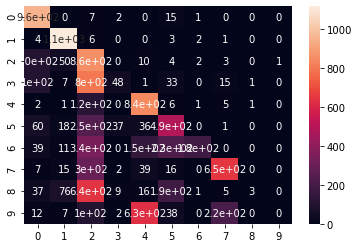

In [23]:
sn.heatmap(cm,annot=True)